In [10]:
"""Read Data, output from BERT Model (ISEAR Dataset) """

import pandas as pd
import os

data_path = "./data/isear_bert"

drop_col = [9, 10, 11, 12, 13, 14, 15]
bert_train = pd.read_csv(os.path.join(data_path, "train-16.csv"), header=None, on_bad_lines='skip', delimiter="|").drop(columns=drop_col)
bert_val = pd.read_csv(os.path.join(data_path, "val-16.csv"), header=None, on_bad_lines='skip', delimiter="|").drop(columns=drop_col)
bert_test = pd.read_csv(os.path.join(data_path, "test-16.csv"), header=None, on_bad_lines='skip', delimiter="|").drop(columns=drop_col)

bert_all = pd.concat([bert_train, bert_val, bert_test])
bert_all

,0,1,2,3,4,5,6,7,8
0,When I understood that I was admitted to the U...,4.0,-4.143373,-4.099311,-4.180825,-3.873905,3.270709,-3.883025,-3.976190
1,I broke a window of a neighbouring house and I...,1.0,-4.454488,2.634034,-3.970481,-3.600777,-4.260800,-3.508614,-4.351669
2,Got a big fish in fishing.,4.0,-3.871844,-4.237987,-4.067472,-3.916490,3.443163,-4.022819,-3.743179
3,"Whenever I am alone in a dark room, walk alone...",1.0,-4.045258,3.200204,-3.871938,-3.878467,-4.119332,-3.877209,-3.389095
4,I bought a possible answer to a homework probl...,5.0,-4.648178,-4.786387,-1.271109,-2.308218,-4.468682,0.195158,-2.507853
...,...,...,...,...,...,...,...,...,...
1140,Not being a good host for a friend from a far ...,3.0,-3.077817,-5.027366,-3.306948,1.170537,-5.571788,-1.354663,-2.787492
1141,"I had a very horrible dream one night, I dream...",1.0,-4.497149,2.975088,-3.899056,-3.790592,-4.291361,-3.033495,-3.544418
1142,"My sweetheart left me, or rather we decided to...",0.0,2.665590,-4.259548,-3.877426,-3.458135,-3.568334,-3.607715,-3.872411
1143,My boyfriend made me a proposal.,4.0,-4.251548,-4.527634,-3.848884,-4.058742,3.007751,-3.362574,-4.002860


In [8]:
from main import *


"""
Training of the ORD and Soft Decision Maker
"""
train(bert_output=bert_all)

Data Distribution after SMOTE : 

1    6172
0    6172
Name: 1, dtype: int64

PCA variance of 3 dimensions :  [0.69832058 0.1398979  0.08034563]

Shape train and test data, after train_test_split : 
(9875, 3) (9875,) (2469, 3) (2469,)

Train Accuracy: 79.03%
              precision    recall  f1-score   support

           0       0.77      0.84      0.80      6172
           1       0.82      0.74      0.78      6172

    accuracy                           0.79     12344
   macro avg       0.79      0.79      0.79     12344
weighted avg       0.79      0.79      0.79     12344

[[5166 1006]
 [1583 4589]]


Test Accuracy: 79.06%
              precision    recall  f1-score   support

           0       0.77      0.84      0.80      1235
           1       0.82      0.74      0.78      1234

    accuracy                           0.79      2469
   macro avg       0.79      0.79      0.79      2469
weighted avg       0.79      0.79      0.79      2469

[[1036  199]
 [ 318  916]]
__________

In [9]:
"""Inference Cell"""
sample = bert_all.head()
output = inference(bert_output=sample)
output

Index([            'sentence',                'ytrue',                      2,
                            3,                      4,                      5,
                            6,                      7,                      8,
                'predictions',                'match',                  '_id',
                 'match_top2',           'match_top3',                 'top2',
                       'top3',       'ytrue_emotions', 'predictions_emotions',
               'classifier_1',         'classifier_2',         'classifier_3'],
      dtype='object')


,sentence,ytrue,2,3,4,5,6,7,8,predictions,...,top3,ytrue_emotions,predictions_emotions,classifier_1,classifier_2,classifier_3,top_2nd_recommendation_by_model,top_3rd_recommendation_by_model,final,low_confidence
0,When I understood that I was admitted to the U...,4.0,-4.143373,-4.099311,-4.180825,-3.873905,3.270709,-3.883025,-3.976190,4.0,...,5.0,joy,joy,1,1,1,guilt,shame,[joy],0
1,I broke a window of a neighbouring house and I...,1.0,-4.454488,2.634034,-3.970481,-3.600777,-4.260800,-3.508614,-4.351669,1.0,...,3.0,fear,fear,1,1,1,shame,guilt,[fear],0
2,Got a big fish in fishing.,4.0,-3.871844,-4.237987,-4.067472,-3.916490,3.443163,-4.022819,-3.743179,4.0,...,0.0,joy,joy,1,1,1,disgust,sadness,[joy],0
3,"Whenever I am alone in a dark room, walk alone...",1.0,-4.045258,3.200204,-3.871938,-3.878467,-4.119332,-3.877209,-3.389095,1.0,...,2.0,fear,fear,1,1,1,disgust,anger,[fear],0
4,I bought a possible answer to a homework probl...,5.0,-4.648178,-4.786387,-1.271109,-2.308218,-4.468682,0.195158,-2.507853,5.0,...,3.0,shame,shame,0,0,0,anger,guilt,"[shame, anger, guilt]",1


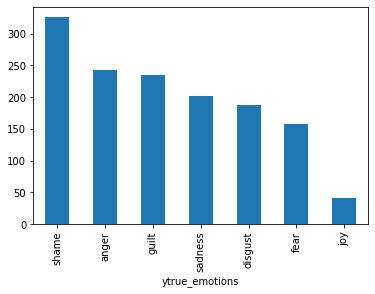

In [11]:
"""
BERT Output Analysis
"""
from utilities import *
bert_all, conf_df_1, conf_df_2, conf_df_3, missclassified = bert_output_formatter(bert_all)
ms = missclassified.groupby("ytrue_emotions").count()["sentence"]
ms.sort_values(ascending=False).plot.bar()
ms2 =  missclassified.groupby(["ytrue_emotions", "predictions_emotions"]).count()["sentence"]

SHAME


<AxesSubplot:ylabel='sentence'>

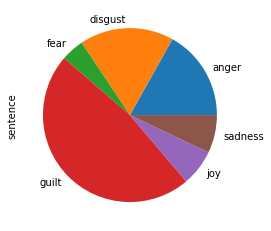

In [12]:

print("SHAME")
shame = ms2.loc["shame"]
shame.plot(kind="pie")


ANGER


<AxesSubplot:ylabel='sentence'>

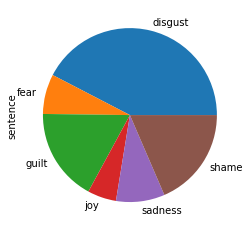

In [13]:
print("ANGER")
anger = ms2.loc["anger"]
anger.plot(kind="pie")

GUILT


<AxesSubplot:ylabel='sentence'>

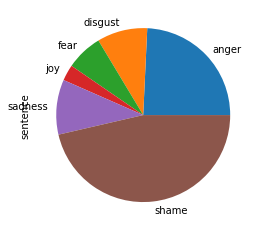

In [14]:
print("GUILT")
guilt = ms2.loc["guilt"]
guilt.plot(kind="pie")

SADNESS


<AxesSubplot:ylabel='sentence'>

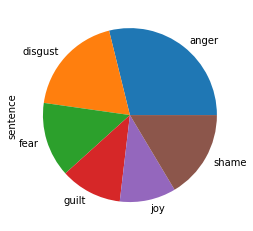

In [15]:
print("SADNESS")
sad = ms2.loc["sadness"]
sad.plot(kind="pie")

DISGUST


<AxesSubplot:ylabel='sentence'>

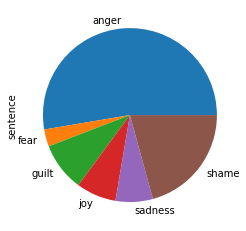

In [16]:
print("DISGUST")
dis = ms2.loc["disgust"]
dis.plot(kind="pie")

FEAR


<AxesSubplot:ylabel='sentence'>

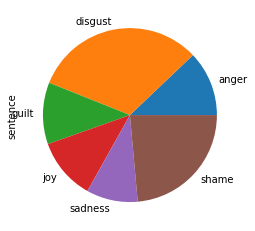

In [17]:
print("FEAR")
fear = ms2.loc["fear"]
fear.plot(kind="pie")

JOY


<AxesSubplot:ylabel='sentence'>

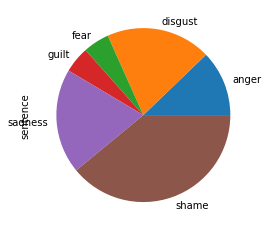

In [18]:
print("JOY")
joy = ms2.loc["joy"]
joy.plot(kind="pie")

In [ ]:

"""
shame is misclassified as guilt. ##
anger is missclassified as disgust.
guilt is missclassified as shame. ##
sadness is missclassified as anger.
disgust is missclassfied as shame.
fear is missclassified as disgust.
joy is missclassified as shame.
"""